# Gandal disorder genes

In [102]:
# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
import sys, os
sys.path.append('../code')
from processing_helpers import *
from analysis_helpers import *
from gradientVersion import *
from mri_maps import *
from enrichments import *
from disorders import *
%R source("../code/enrichmentsPlots.R");
%R source("../code/plot_maps.R");

## Get gradients version with null weights from sim maps

In [3]:
dm_hcp_3d_ds5 = gradientVersion().fit('hcp_3donors_ds5')
# dm_hcp_ds9 = gradientVersion(approach='dm').fit('hcp_ds9')

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [209]:
version = dm_hcp_3d_ds5
scores = version.clean_scores()
weights = version.weights.iloc[:, :3]

In [5]:
# null_scores = version.make_null_scores(n=1000, save_name = 'hcp_3d_ds5_spin_1000')
# generate_spins_from_gradients(scores, n=1000, outfile='../outputs/permutations/hcp_3d_ds5_spin_1000.npy', atlas='hcp')
null_scores = np.load('../outputs/permutations/hcp_3d_ds5_spin_1000.npy')

In [61]:
# null_weights = version.make_null_weights(null_scores, save_name = 'hcp_3d_ds5_spin_1000_weights')
# null_weights_sim = np.load('../outputs/permutations/hcp_3d_ds5_sim_1000_weights.npy')
null_weights_sim = np.load('../outputs/permutations/hcp_3d_ds5_sim_10000_weights.npy')
# null_weights_spin = np.load('../outputs/permutations/hcp_3d_ds5_spin_1000_weights.npy')

In [7]:
null_weights_shuffle = shuffle_gene_weights(version.weights, n=1000, rank=False)

In [8]:
null_scores.shape

(137, 3, 1000)

In [108]:
null_weights = null_weights_shuffle

## Gandal genes

In [104]:
gandal_genes_micro = get_gandal_genes(which='microarray')
gandal_genes_rna = get_gandal_genes(which='rnaseq')

In [218]:
null_p_versions_dict = {
    'Microarray Gene Sig': get_gene_sig(weights, null_weights, gandal_genes_micro),
    'RNAseq Gene Sig': get_gene_sig(weights, null_weights, gandal_genes_rna),
    'Microarray Gene Dot': get_gene_dot(weights, null_weights, gandal_genes_micro),
    'RNAseq Gene Dot': get_gene_dot(weights, null_weights, gandal_genes_rna),    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

In [166]:
genes_log2FC = gandal_genes_micro.loc[lambda x: ~np.isnan(x['ASD.log2FC']), 'ASD.log2FC'].copy()
matched_genes = set(weights.index).intersection(genes_log2FC.index)
gene_mask = np.isin(weights.index, list(matched_genes))
weights_matched = weights.values[gene_mask, :3]
weights_matched.T @ genes_log2FC.loc[matched_genes]

array([-0.00413942, -0.00809784,  0.05425522])

In [181]:
gandal_genes = gandal_genes_micro

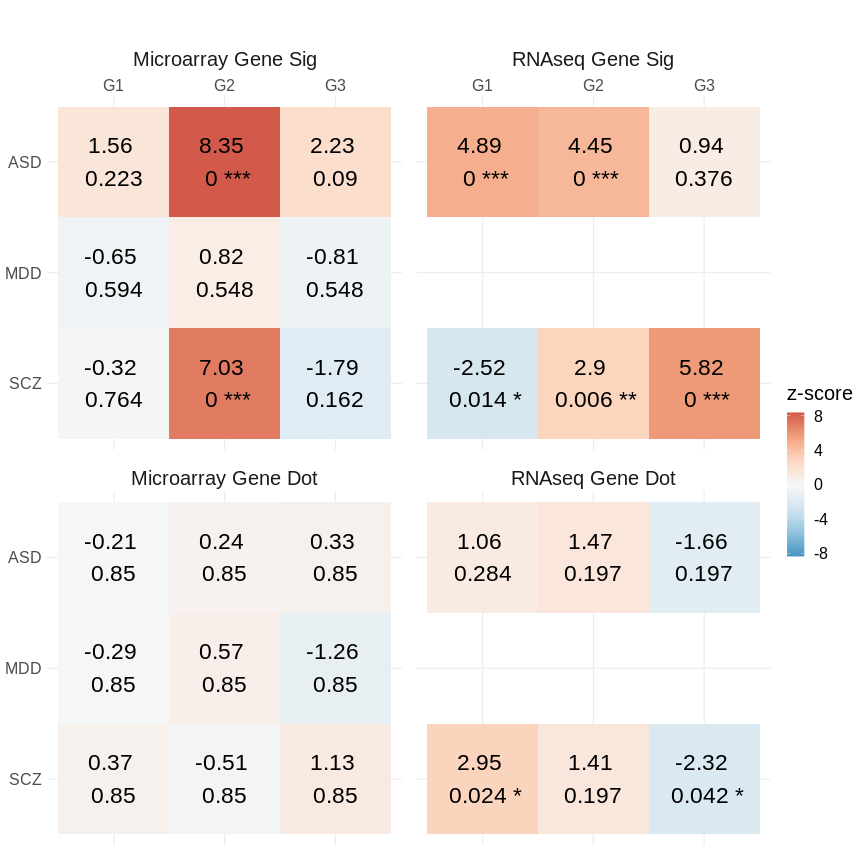

In [219]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [210]:
null_p_versions_dict = {
    'Microarray Gene Sig Upreg, Pos': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='pos'),
    'Microarray Gene Sig Upreg, Neg': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='neg'),
    'Microarray Gene Sig Dnreg, Pos': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='pos'),
    'Microarray Gene Sig Dnreg, Neg': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='neg'),    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

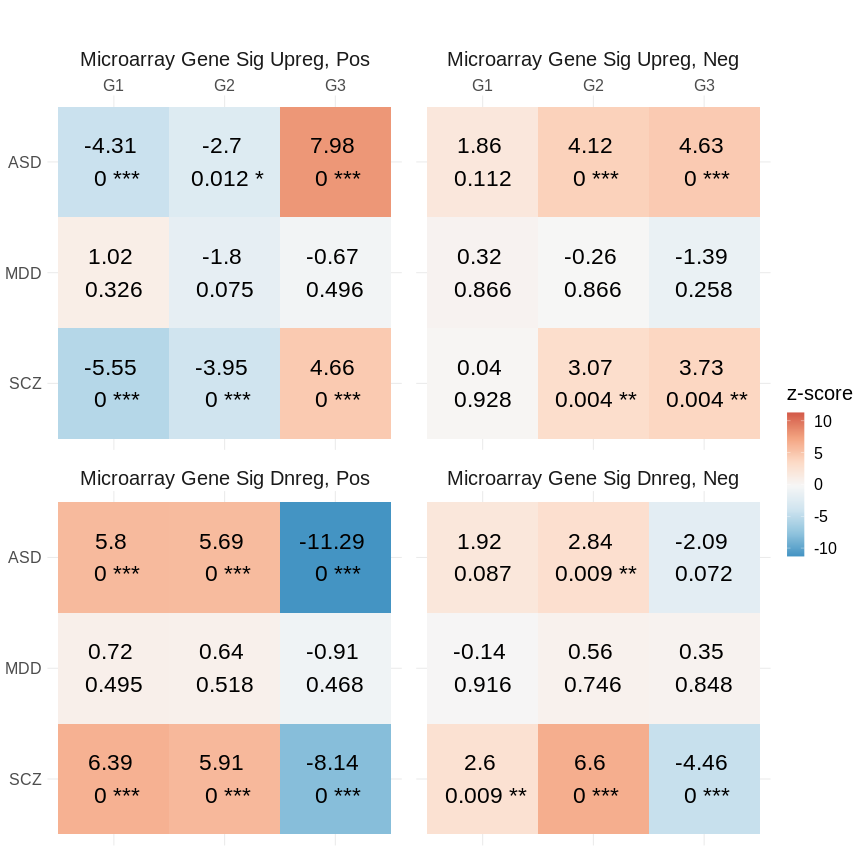

In [211]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [216]:
null_p_versions_dict = {
    'RNAseq Gene Sig Upreg, Pos': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='pos', posneg_weights='pos'),
    'RNAseq Gene Sig Upreg, Neg': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='pos', posneg_weights='neg'),
    'RNAseq Gene Sig Dnreg, Pos': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='neg', posneg_weights='pos'),
    'RNAseq Gene Sig Dnreg, Neg': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='neg', posneg_weights='neg'),    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

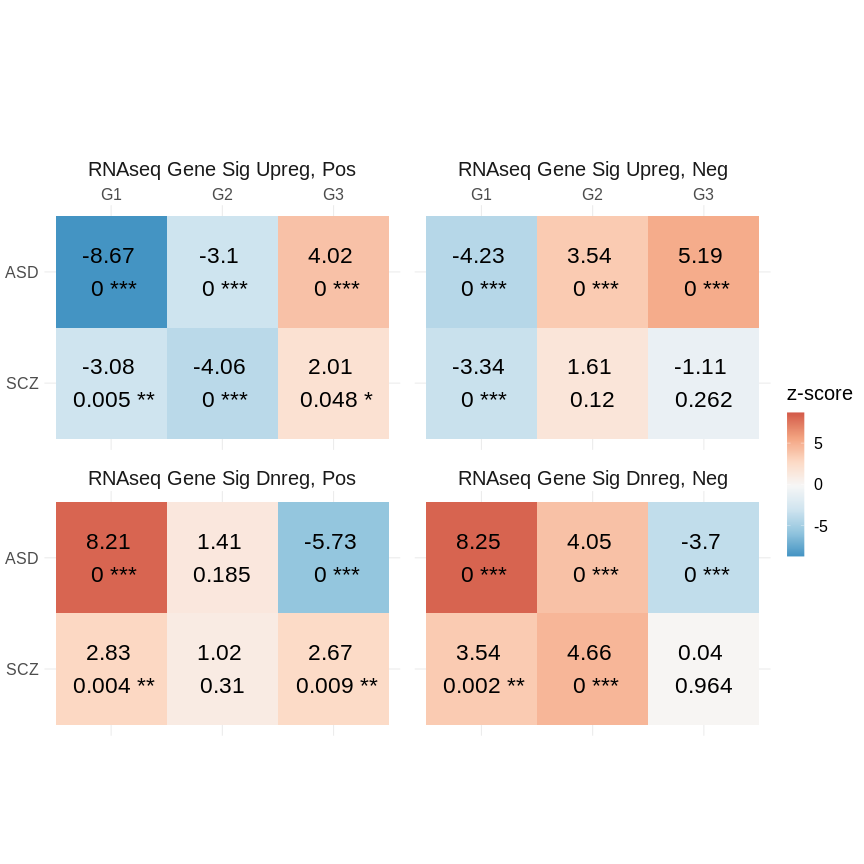

In [217]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [212]:
null_p_versions_dict = {
    'Microarray Gene Dot Upreg, Pos': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='pos'),
    'Microarray Gene Dot Upreg, Neg': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='pos', posneg_weights='neg'),
    'Microarray Gene Dot Dnreg, Pos': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='pos'),
    'Microarray Gene Dot Dnreg, Neg': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='neg', posneg_weights='neg'),    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

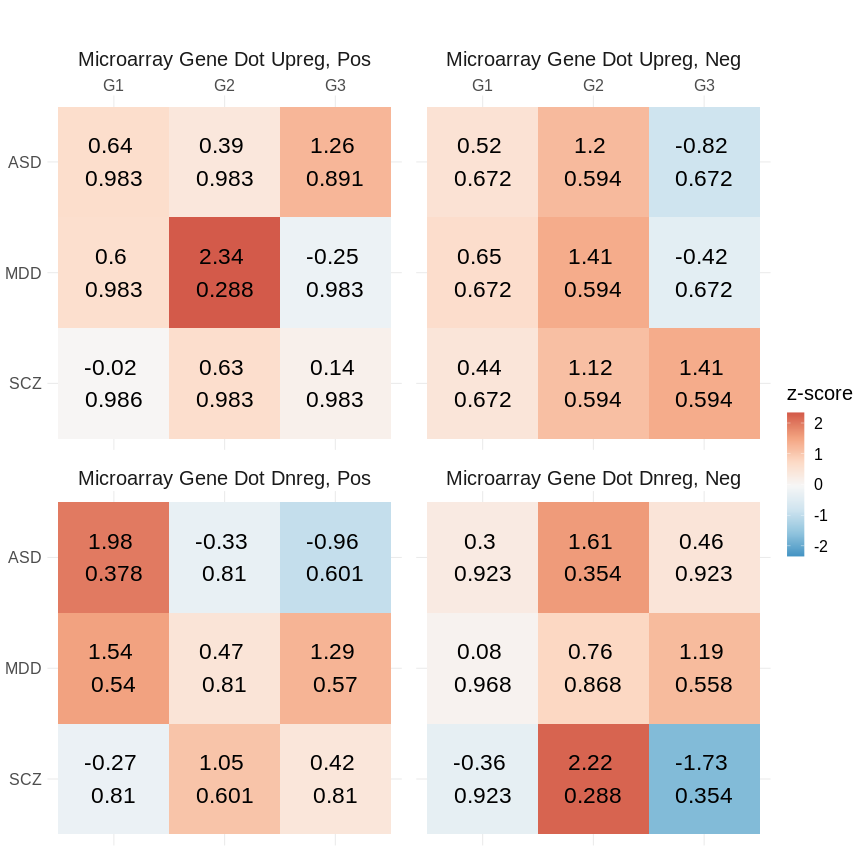

In [213]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [214]:
null_p_versions_dict = {
    'RNAseq Gene Dot Upreg, Pos': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='pos', posneg_weights='pos'),
    'RNAseq Gene Dot Upreg, Neg': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='pos', posneg_weights='neg'),
    'RNAseq Gene Dot Dnreg, Pos': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='neg', posneg_weights='pos'),
    'RNAseq Gene Dot Dnreg, Neg': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='neg', posneg_weights='neg'),  
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

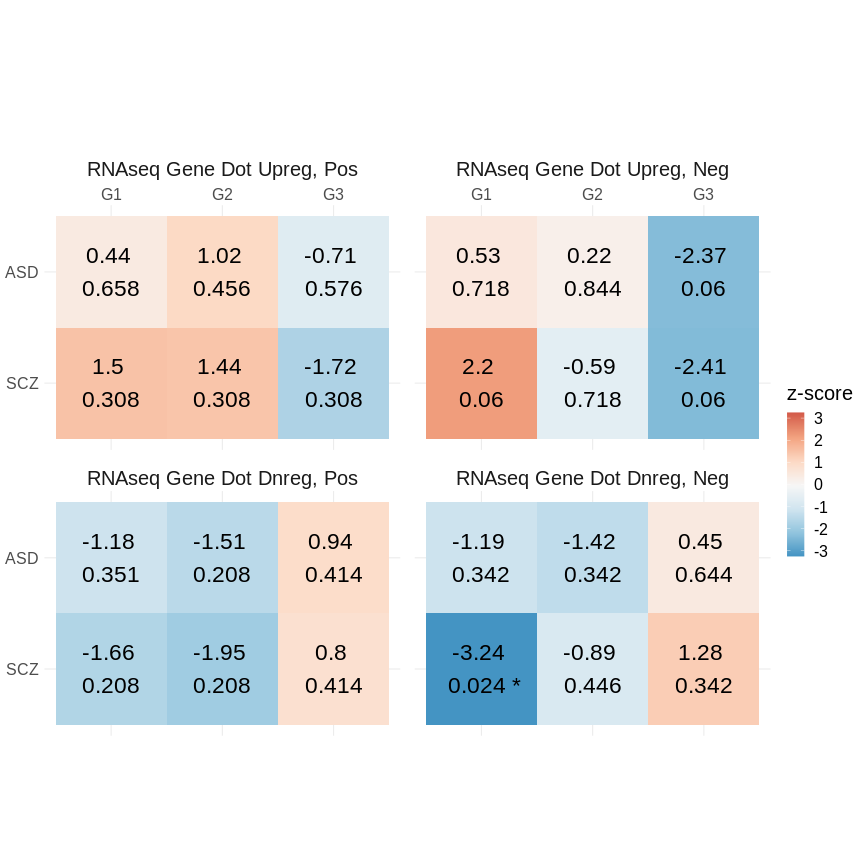

In [215]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [148]:
gene_maps_dict = {
    'Microarray': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='', return_maps=True),    
    'RNAseq': get_gene_map_corr(version, null_scores, gandal_genes_rna, posneg='', return_maps=True)
}

gene_maps_plot = (pd.concat(gene_maps_dict)
                  .reset_index()
                  .rename({'level_0':'version'},axis=1)
)

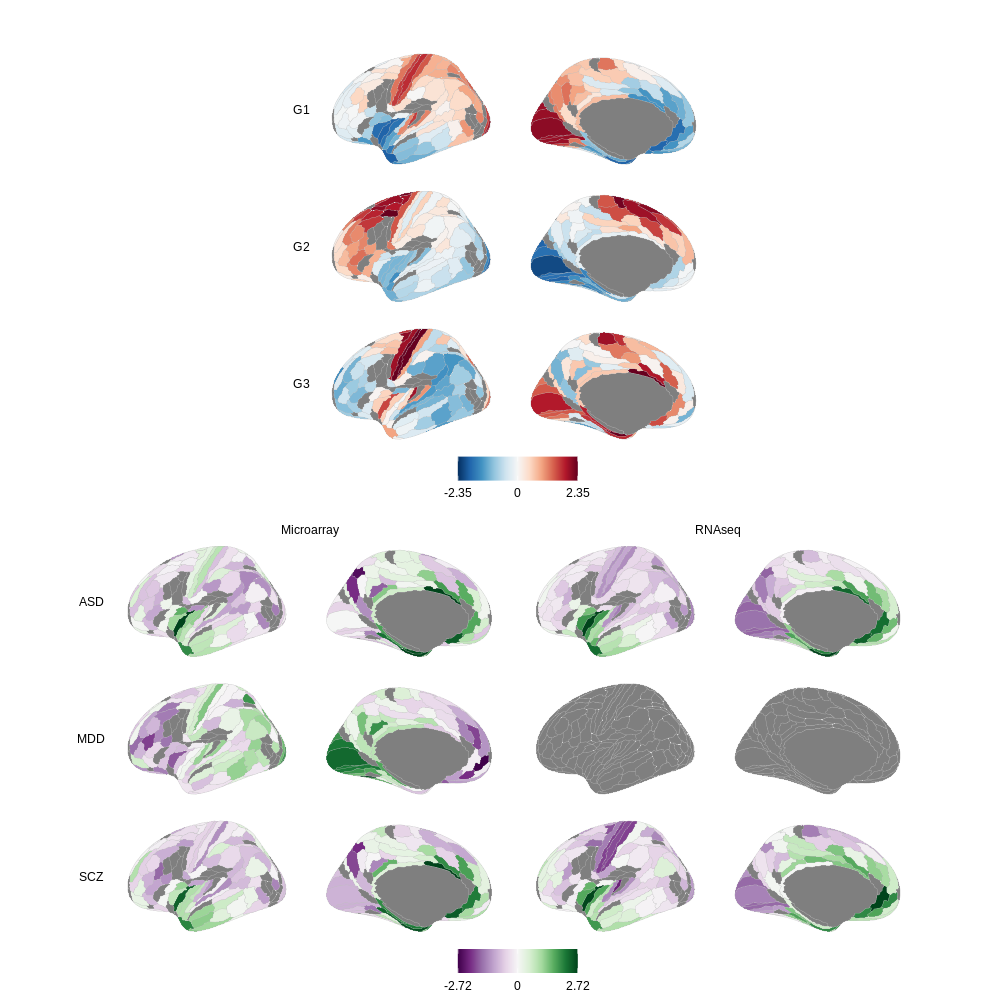

In [149]:
%%R -i gene_maps_plot -i scores -w 10 -h 10 --units in -r 100
source("../code/brainPlots.R")
g1 <- plot_hcp(scores %>% mutate(version=''), switch='y')
g2 <- plot_hcp(gene_maps_plot, colors=brewer.prgn(100), switch='y')

g1 / g2 #+ plot_layout(widths=c(1,2))

In [37]:
null_p_versions_dict = {    
    'Microarray Map Corrs': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg=''),
    'RNAseq Map Corrs': get_gene_map_corr(version, null_scores, gandal_genes_rna, posneg=''),
    'Microarray Gene Corrs': get_gene_corr(weights, null_weights, gandal_genes_micro),
    'RNAseq Gene Corrs': get_gene_corr(weights, null_weights, gandal_genes_rna)
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

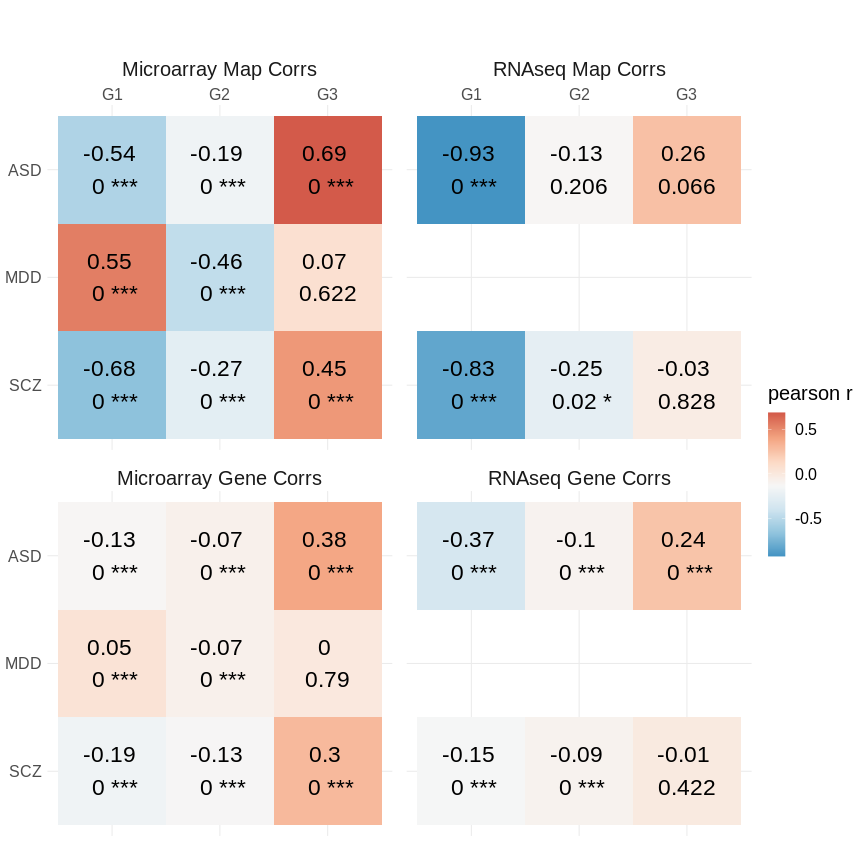

In [151]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2) + ggtitle('')

In [152]:
gene_maps_dict = {
    'Microarray': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='', sig_thresh=.05, return_maps=True),    
    'RNAseq': get_gene_map_corr(version, null_scores, gandal_genes_rna, posneg='', sig_thresh=.05, return_maps=True)
}

gene_maps_plot = (pd.concat(gene_maps_dict)
                  .reset_index()
                  .rename({'level_0':'version'},axis=1)
)

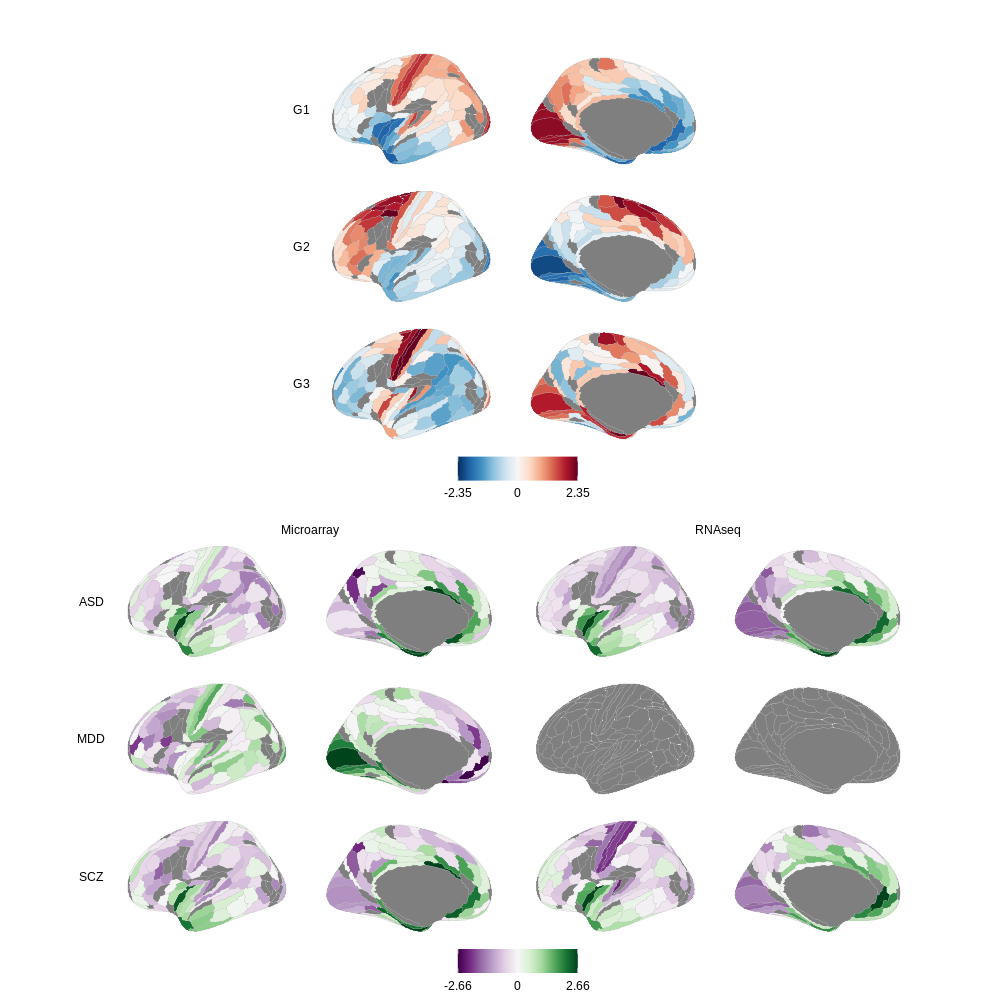

In [153]:
%%R -i gene_maps_plot -i scores -w 10 -h 10 --units in -r 100
source("../code/brainPlots.R")
g1 <- plot_hcp(scores %>% mutate(version=''), switch='y')
g2 <- plot_hcp(gene_maps_plot, colors=brewer.prgn(100), switch='y')

g1 / g2 #+ plot_layout(widths=c(1,2))

In [39]:
null_p_versions_dict = {
    'Microarray Map Corrs': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='', sig_thresh=.05),    
    'RNAseq Map Corrs': get_gene_map_corr(version, null_scores, gandal_genes_rna, posneg='', sig_thresh=.05),    
    'Microarray Gene Corrs': get_gene_corr(weights, null_weights, gandal_genes_micro, sig_thresh=.05),
    'RNAseq Gene Corrs': get_gene_corr(weights, null_weights, gandal_genes_rna, sig_thresh=.05)    
    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

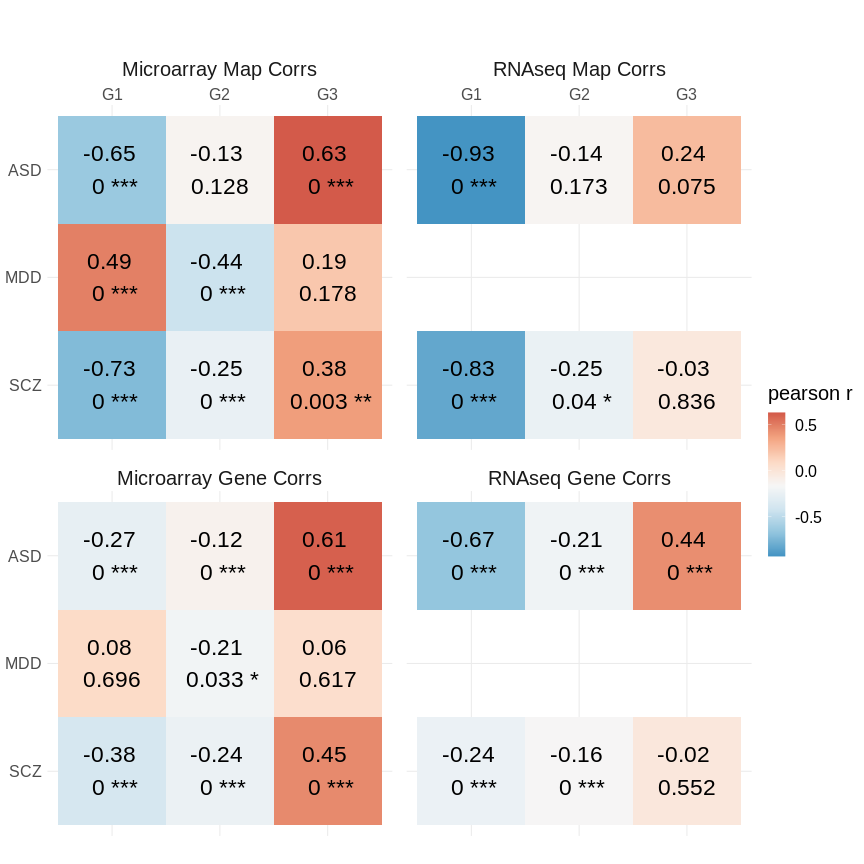

In [155]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps_2(null_p_versions, ncol=2) + ggtitle('')

In [63]:
null_weights[:,:,3].mean(axis=1)

array([ 0.00932005,  0.00847658, -0.00219182, ..., -0.00288746,
       -0.01220526,  0.00311462])

In [66]:
null_weights[:,:,3].mean(axis=1)

array([ 0.00932005,  0.00847658, -0.00219182, ..., -0.00288746,
       -0.01220526,  0.00311462])

In [64]:
null_p_versions_dict = {
    'Microarray Gene Abs Dot': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='abs', absolute=True),
    'RNAseq Gene Abs Dot': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='abs', absolute=True),
    'Microarray Gene Sig Abs Dot': get_gene_dot(weights, null_weights, gandal_genes_micro, posneg='abs', absolute=True, sig_thresh=.05),
    'RNAseq Gene Sig Abs Dot': get_gene_dot(weights, null_weights, gandal_genes_rna, posneg='abs', absolute=True, sig_thresh=.05)
    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

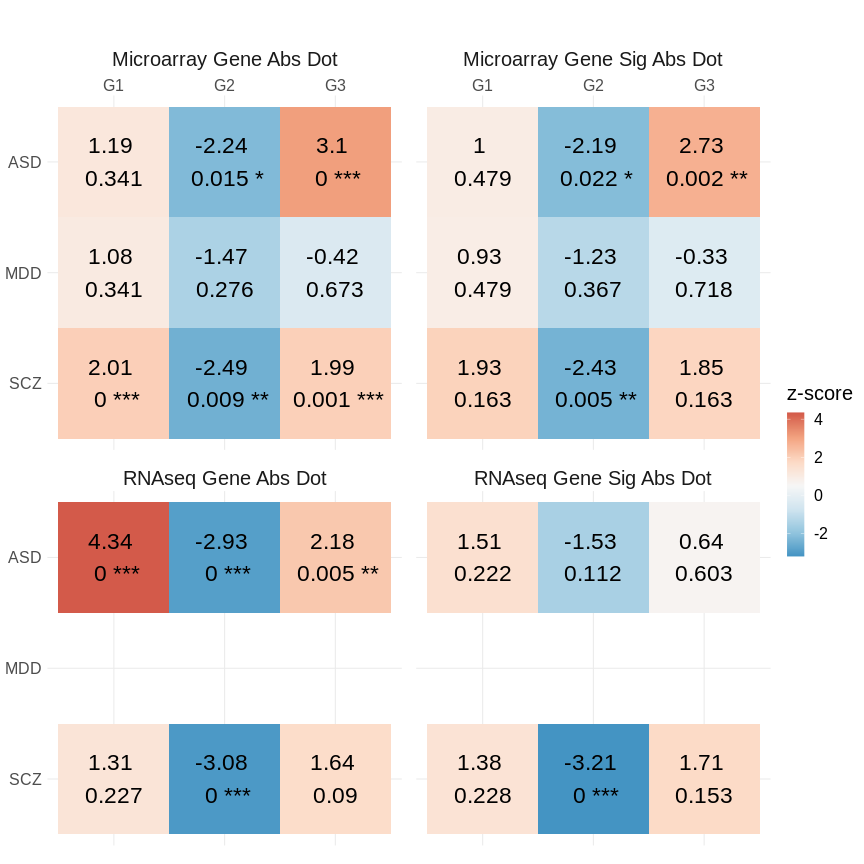

In [65]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

In [31]:
null_p_versions_dict = {
    'Microarray Gene': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='abs'),
    'RNAseq Gene': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='abs'),
    'Microarray Gene Sig Abs': get_gene_sig(weights, null_weights, gandal_genes_micro, posneg='abs', absolute=True, sig_thresh=.05),
    'RNAseq Gene Sig Abs': get_gene_sig(weights, null_weights, gandal_genes_rna, posneg='abs', absolute=True, sig_thresh=.05)
    
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

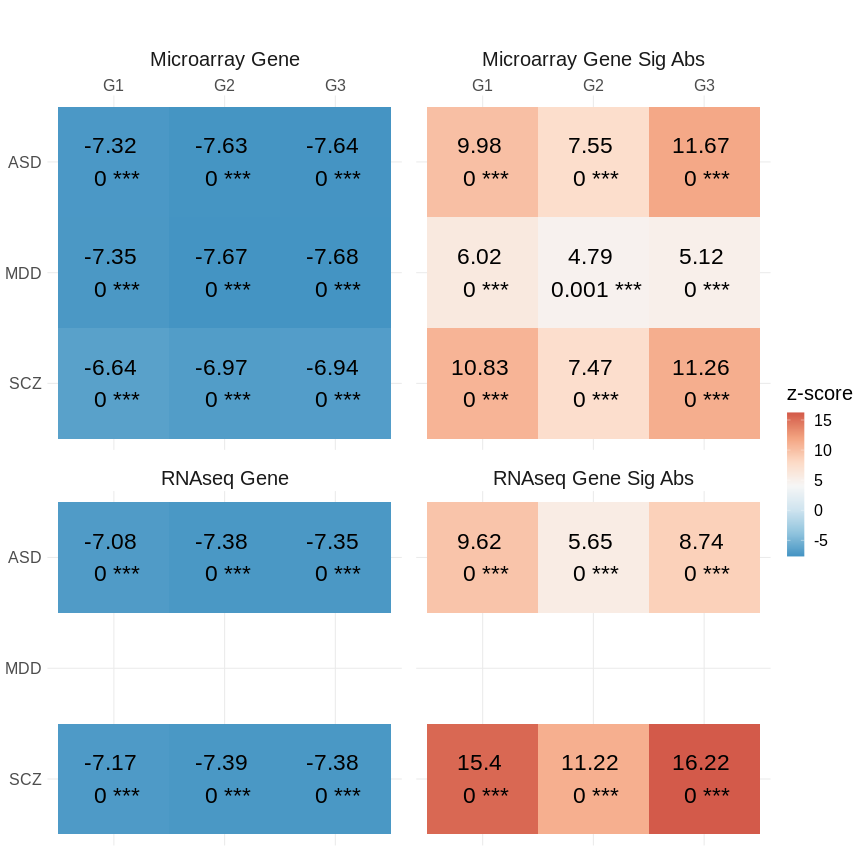

In [32]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions, ncol=2) + ggtitle('')

## Get Gandal genes - RNAseq

In [12]:
gandal_genes = get_gandal_genes(which='rnaseq')

In [415]:
null_weights = null_weights_sim

In [416]:
null_p_sig_pos = get_gene_sig(weights, null_weights, gandal_genes, posneg='pos')
null_p_sig_neg = get_gene_sig(weights, null_weights, gandal_genes, posneg='neg')
null_p_sig_abs = get_gene_sig(weights, null_weights, gandal_genes, posneg='abs')

In [417]:
null_p_dot_pos = get_gene_dot(weights, null_weights, gandal_genes, posneg='pos')
null_p_dot_neg = get_gene_dot(weights, null_weights, gandal_genes, posneg='neg')
null_p_dot_abs = get_gene_dot(weights, null_weights, gandal_genes, posneg='abs')

In [418]:
null_p_dotsig_pos = get_gene_dot(weights, null_weights, gandal_genes, posneg='pos', sig_thresh=.05)
null_p_dotsig_neg = get_gene_dot(weights, null_weights, gandal_genes, posneg='neg', sig_thresh=.05)
null_p_dotsig_abs = get_gene_dot(weights, null_weights, gandal_genes, posneg='abs', sig_thresh=.05)

In [419]:
null_p_map_pos = get_gene_map_corr(version, null_scores, gandal_genes, posneg='pos')
null_p_map_neg = get_gene_map_corr(version, null_scores, gandal_genes, posneg='neg')
null_p_map_abs = get_gene_map_corr(version, null_scores, gandal_genes, posneg='')

In [420]:
null_p_versions_dict = {
    'Sig log2FC Up': null_p_sig_pos,
    'Sig log2FC Down': null_p_sig_neg,
    'Sig log2FC Abs': null_p_sig_abs,
    'Dot log2FC Up': null_p_dot_pos,
    'Dot log2FC Down': null_p_dot_neg,
    'Dot log2FC Abs': null_p_dot_abs,
    'Dot Sig log2FC Up': null_p_dotsig_pos,
    'Dot Sig log2FC Down': null_p_dotsig_neg,
    'Dot Sig log2FC Abs': null_p_dotsig_abs,    
    'Cor Gene Map Up': null_p_map_pos,
    'Cor Gene Map Down': null_p_map_neg,
    'Cor Gene Map Abs': null_p_map_abs,
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

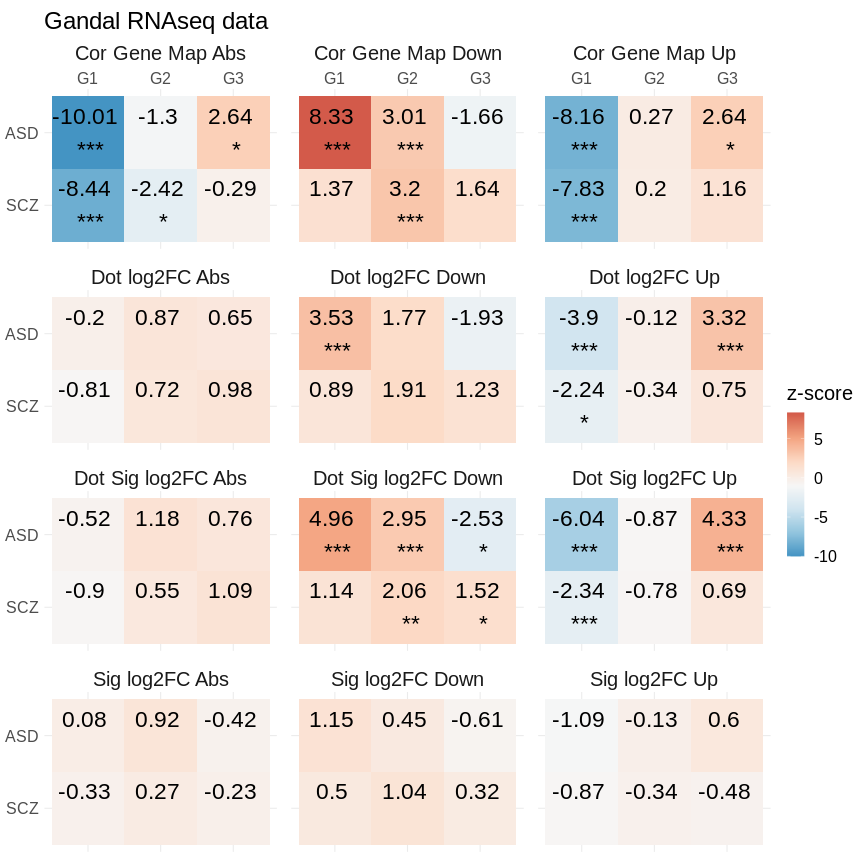

In [425]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Gandal RNAseq data')

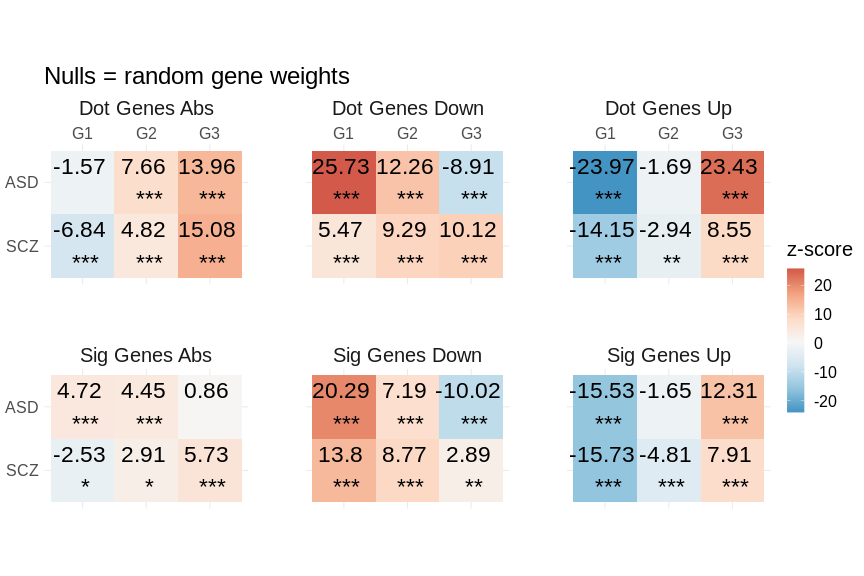

In [138]:
%%R -w 12 -h 8 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Nulls = random gene weights')

## Get Gandal genes - microarray

In [426]:
gandal_genes = get_gandal_genes(which='microarray')

In [427]:
# null_weights = null_weights_shuffle
null_weights = null_weights_sim

In [428]:
null_p_sig_pos = get_gene_sig(weights, null_weights, gandal_genes, posneg='pos')
null_p_sig_neg = get_gene_sig(weights, null_weights, gandal_genes, posneg='neg')
null_p_sig_abs = get_gene_sig(weights, null_weights, gandal_genes, posneg='abs')

In [429]:
null_p_dot_pos = get_gene_dot(weights, null_weights, gandal_genes, posneg='pos')
null_p_dot_neg = get_gene_dot(weights, null_weights, gandal_genes, posneg='neg')
null_p_dot_abs = get_gene_dot(weights, null_weights, gandal_genes, posneg='abs')

In [430]:
null_p_dotsig_pos = get_gene_dot(weights, null_weights, gandal_genes, posneg='pos', sig_thresh=.05)
null_p_dotsig_neg = get_gene_dot(weights, null_weights, gandal_genes, posneg='neg', sig_thresh=.05)
null_p_dotsig_abs = get_gene_dot(weights, null_weights, gandal_genes, posneg='abs', sig_thresh=.05)

In [431]:
null_p_map_pos = get_gene_map_corr(version, null_scores, gandal_genes, posneg='pos')
null_p_map_neg = get_gene_map_corr(version, null_scores, gandal_genes, posneg='neg')
null_p_map_abs = get_gene_map_corr(version, null_scores, gandal_genes, posneg='')

In [432]:
null_p_versions_dict = {
    'Sig log2FC Up': null_p_sig_pos,
    'Sig log2FC Down': null_p_sig_neg,
    'Sig log2FC Abs': null_p_sig_abs,
    'Dot log2FC Up': null_p_dot_pos,
    'Dot log2FC Down': null_p_dot_neg,
    'Dot log2FC Abs': null_p_dot_abs,
    'Dot Sig log2FC Up': null_p_dotsig_pos,
    'Dot Sig log2FC Down': null_p_dotsig_neg,
    'Dot Sig log2FC Abs': null_p_dotsig_abs,    
    'Cor Gene Map Up': null_p_map_pos,
    'Cor Gene Map Down': null_p_map_neg,
    'Cor Gene Map Abs': null_p_map_abs,
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

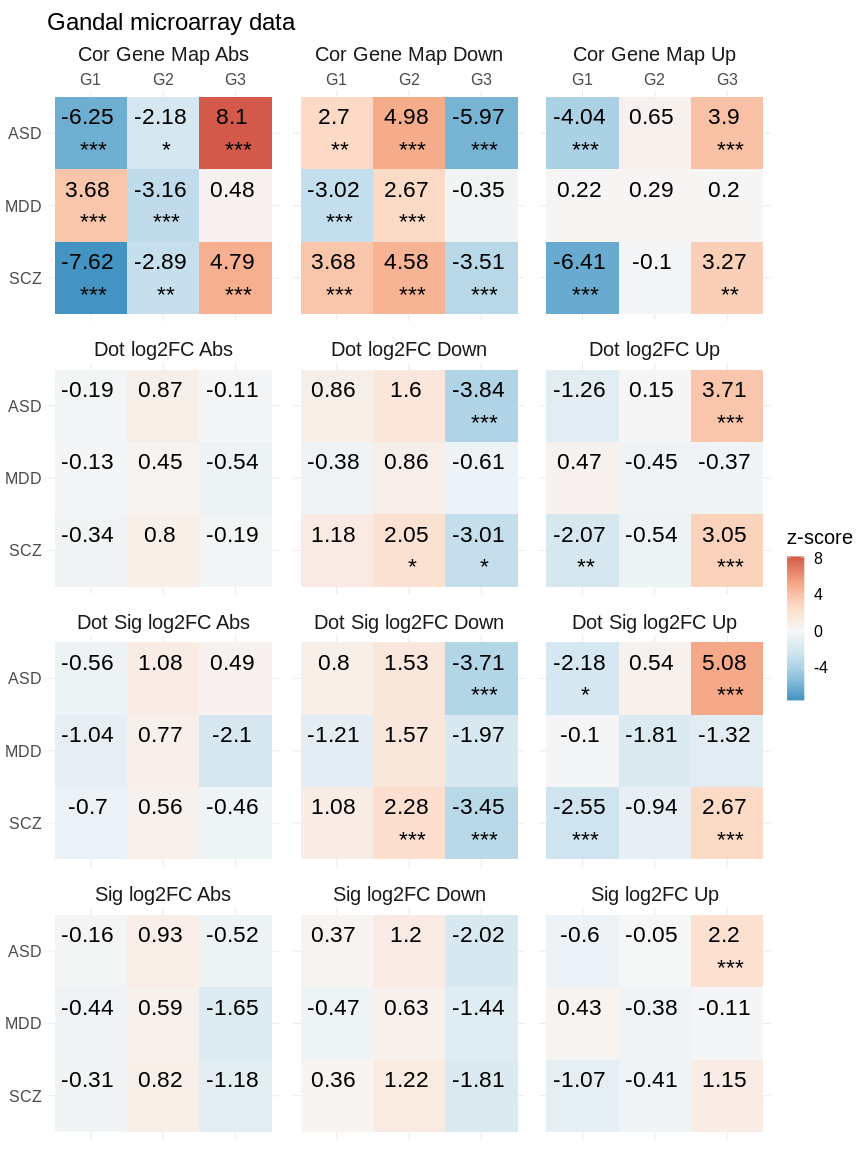

In [433]:
%%R -w 12 -h 16 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Gandal microarray data')

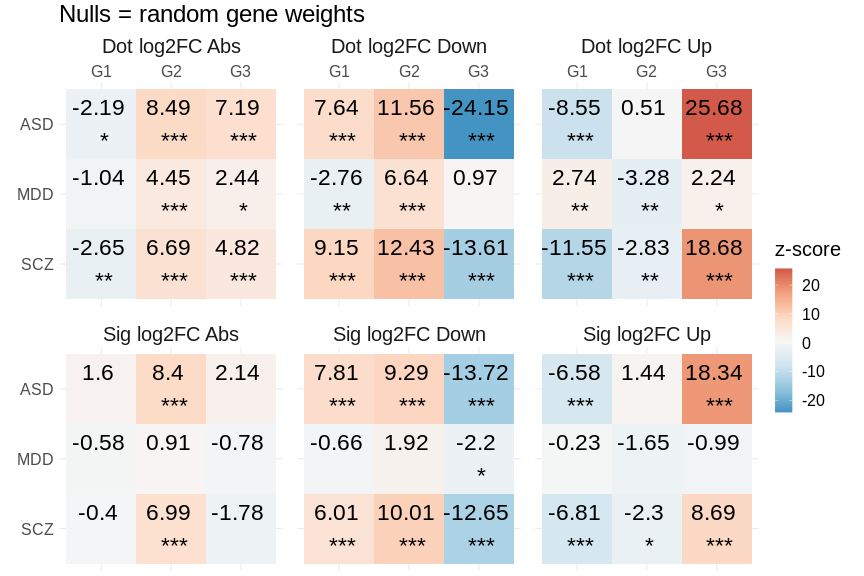

In [256]:
%%R -w 12 -h 8 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Nulls = random gene weights')

## Do map correlations with eigengene map

In [274]:
gandal_genes_micro = get_gandal_genes(which='microarray')
gandal_genes_rna = get_gandal_genes(which='rnaseq')

In [291]:
null_p_versions_dict = {
    'Microarray': get_gene_map_corr(version, null_scores, gandal_genes_micro, posneg='abs', method='mean')
}

null_p_versions = (pd.concat(null_p_versions_dict)
                   .reset_index(0)
                   .rename({'level_0':'version'}, axis=1)
                  )

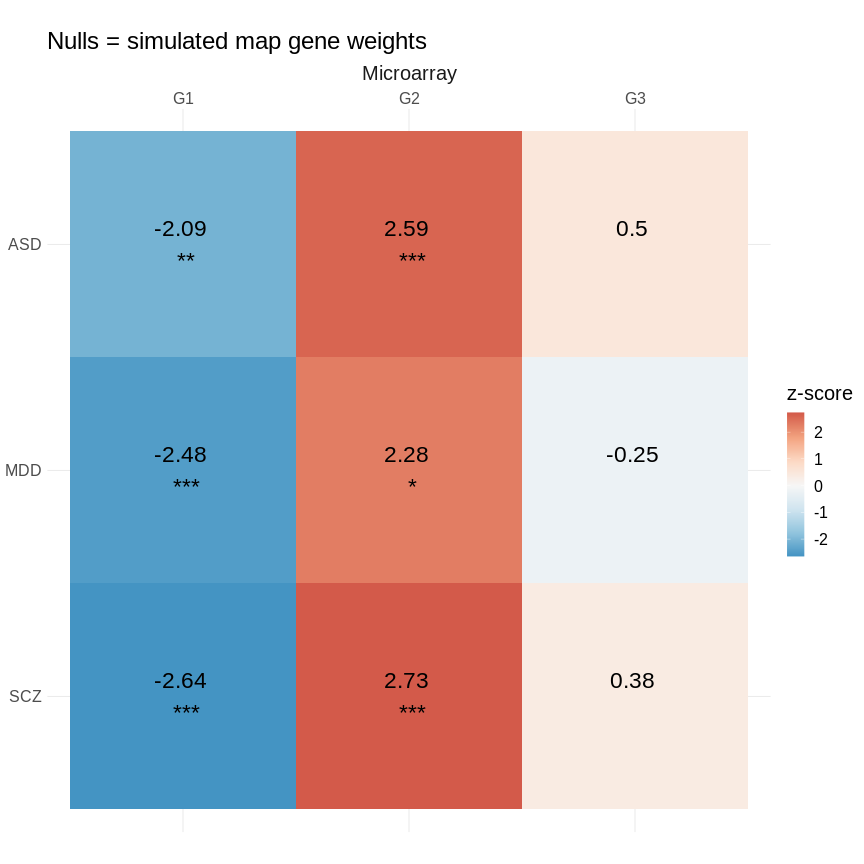

In [292]:
%%R -w 12 -h 12 --units in -i null_p_versions
source("../code/enrichmentsPlots.R")
plot_enrichment_heatmaps(null_p_versions) + ggtitle('Nulls = simulated map gene weights')